In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
# Initialize and train the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))
print("Classification Report:\n", classification_report(y_test, y_pred_lda))


LDA Accuracy: 0.8266666666666667
Confusion Matrix:
 [[ 75   4  22]
 [ 16  71   0]
 [  0  10 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.74      0.78       101
           1       0.84      0.82      0.83        87
           2       0.82      0.91      0.86       112

    accuracy                           0.83       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.83      0.83      0.83       300



In [4]:
# Initialize and train the QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Make predictions
y_pred_qda = qda.predict(X_test)

# Evaluate the model
print("QDA Accuracy:", accuracy_score(y_test, y_pred_qda))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_qda))
print("Classification Report:\n", classification_report(y_test, y_pred_qda))


QDA Accuracy: 0.93
Confusion Matrix:
 [[ 96   2   3]
 [ 10  77   0]
 [  4   2 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       101
           1       0.95      0.89      0.92        87
           2       0.97      0.95      0.96       112

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



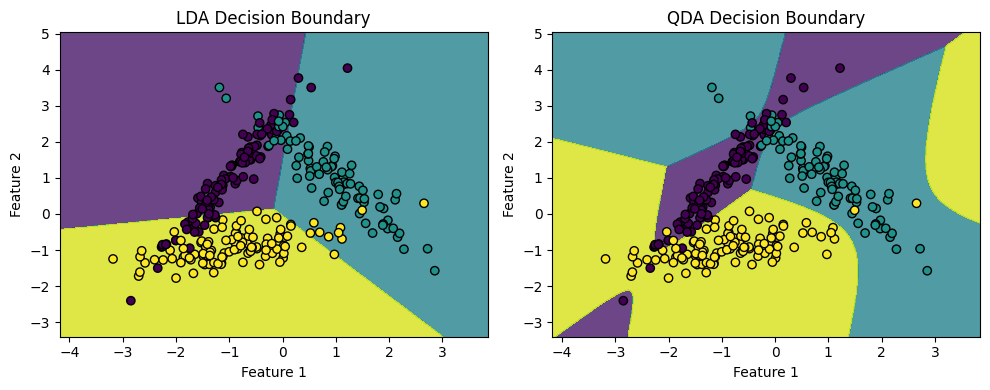

In [5]:
def plot_decision_boundaries(X, y, model, title, subplot_index):
    plt.subplot(subplot_index)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')


plt.figure(figsize=(10, 4))
# Plot decision boundaries for LDA
plot_decision_boundaries(X_test, y_test, lda, "LDA Decision Boundary", 121)

# Plot decision boundaries for QDA
plot_decision_boundaries(X_test, y_test, qda, "QDA Decision Boundary", 122)

plt.tight_layout()
plt.show()


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Define column names
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read the data set
dataset = pd.read_csv(url, names=cls)

In [8]:
# Divide the data set into features (X) and target variable (y)
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

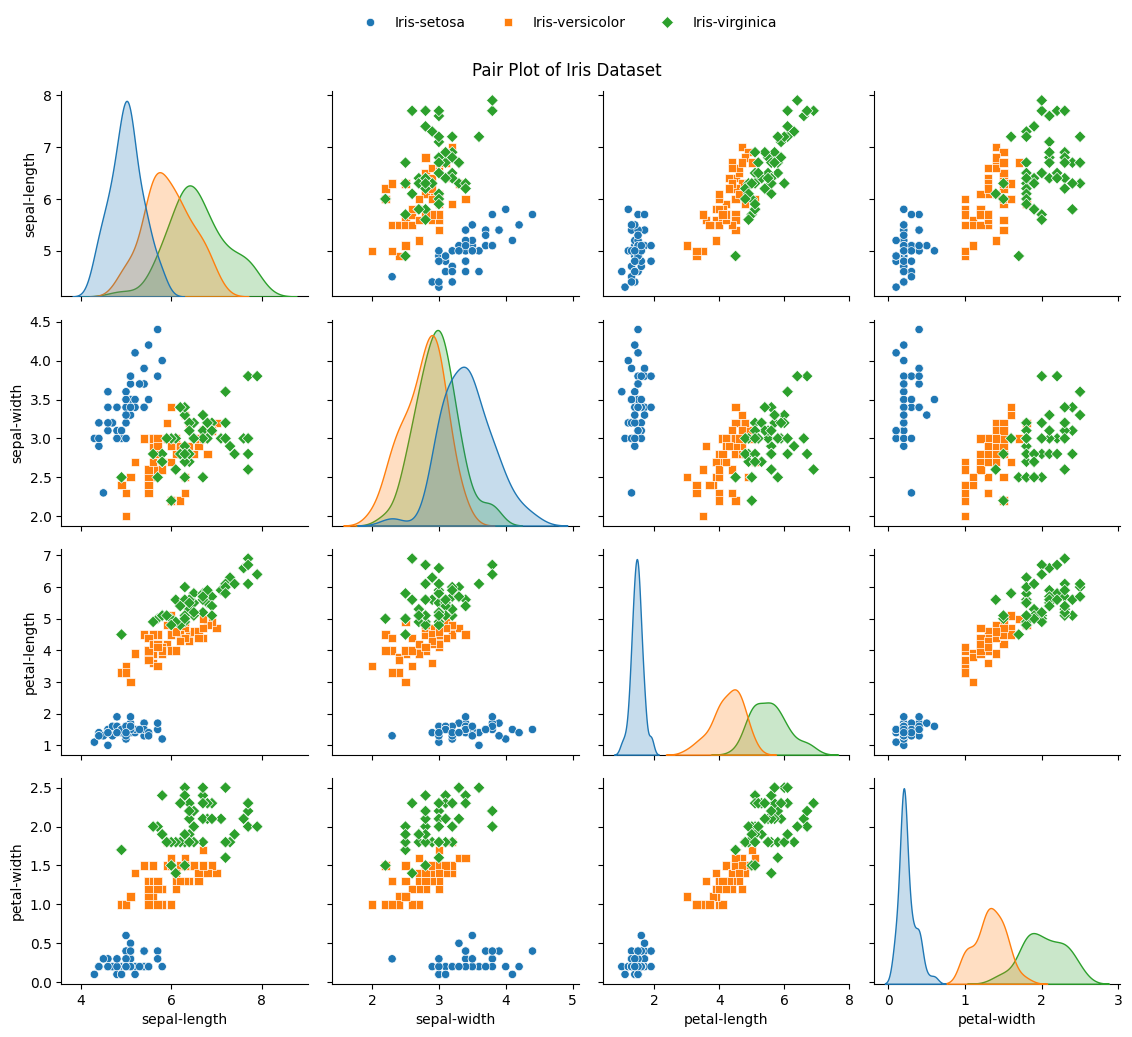

In [9]:
# Create a pair plot to visualize relationships between different features and species.
ax = sns.pairplot(dataset, hue='Class', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Iris Dataset")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.show()

In [10]:
# Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

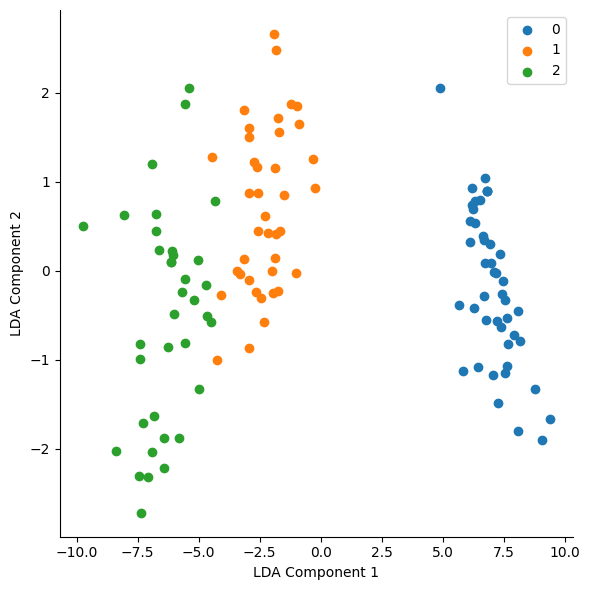

In [12]:
tmp_Df = pd.DataFrame(X_train, columns=['LDA Component 1','LDA Component 2'])
tmp_Df['Class']=y_train

sns.FacetGrid(tmp_Df, hue ="Class",
              height = 6).map(plt.scatter,
                              'LDA Component 1',
                              'LDA Component 2')

plt.legend(loc='upper right')

In [13]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Accuracy: 0.97


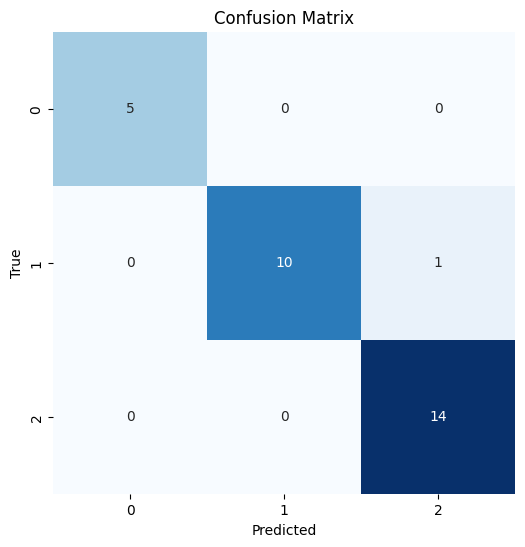

In [14]:
#Assume 'y_test' and 'y_pred' are already defined
accuracy = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)

#Display the accuracy
print(f'Accuracy: {accuracy:.2f}')

#Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()